1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


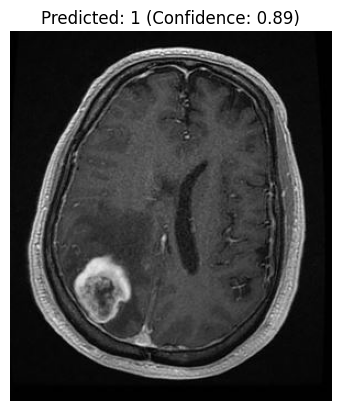

Prediction: 1 (Confidence: 0.89)


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the saved model
model = load_model('VGG_model.h5')

# Define image size (must match the size used during training)
IMG_SIZE = (224, 224)  # Change this if you used a different size

# Function to preprocess and predict a single image
def predict_image(img_path):
    # Load and resize the image
    img = image.load_img(img_path, target_size=IMG_SIZE)

    # Convert to array
    img_array = image.img_to_array(img)

    # Preprocess the image
    img_array = preprocess_input(img_array)

    # Expand dimensions to match model input (batch size of 1)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array)[0][0]  # Get the first prediction

    # Convert sigmoid output to class label
    predicted_label = 1 if prediction > 0.5 else 0

    # Show the image with the predicted label
    plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label} (Confidence: {prediction:.2f})")
    plt.show()

    print(f"Prediction: {predicted_label} (Confidence: {prediction:.2f})")




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


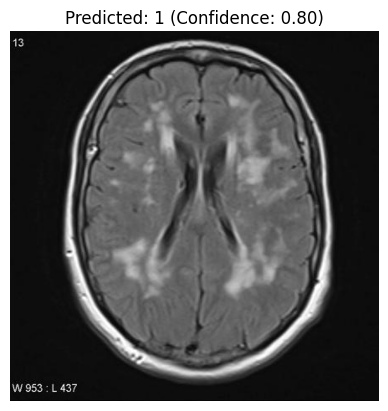

Prediction: 1 (Confidence: 0.80)


In [5]:
# Example usage
img_path = '/content/44no.jpg'  # Change this to your test image path
predict_image(img_path)